# HiPSCat datasets and LSDB framework

HiPSCat datasets can be stored and read via
* local disk 
* s3 buckets like filesystems

They can also be read from a 'registry', which can be inferred from a directory (or bucket) of HiPSCats. The registry will list all available HiPSCats that are in a local directory, or in a valid abstract file system. From there it will also allow the user to instantiate a LSDB.Catalog object from the registry. 

## Reading a single catalog

In [1]:
from hipscat.catalog import Catalog

#reading from local disk
path_to_local_catalog = "/epyc/projects3/sam_hipscat/ADASS_demo/gaia_dr3/"

gaia = Catalog.read_from_hipscat(path_to_local_catalog)

print(gaia, type(gaia))

<hipscat.catalog.catalog.Catalog object at 0x7fd9ff9a5f90> <class 'hipscat.catalog.catalog.Catalog'>


In [2]:
#reading from abstract file source:
import os

path_to_cloud_catalog = "abfs:///hipscat/catalogs/gaia_dr3"
storage_options = {
    "account_name" : "linccdata",
    "account_key"    : "ezBADSIGArKcI0JNHFdRfLF5S/64ZJcdrbXKbK5GJikF+YAC0hDAhMputN59HA4RS4N3HmjNZgdc+AStBFuQ6Q=="
}
gaia = Catalog.read_from_hipscat(path_to_cloud_catalog, storage_options)

print(gaia, type(gaia))

<hipscat.catalog.catalog.Catalog object at 0x7ffab97f9bd0> <class 'hipscat.catalog.catalog.Catalog'>


## Reading HiPSCat's from an 'almanac'

Say you don't know the catalogs you have access too. Either locally or you're given a bucket and you want to load from there.

In [1]:
from hipscat.inspection.almanac import Almanac
HIPS_DIR = "/epyc/projects3/sam_hipscat/ADASS_demo/almanac/"
almanac = Almanac(dirs=[HIPS_DIR])
for alm in almanac.catalogs():
    print(alm)
    print(almanac.entries[alm].catalog_path)

gaia
/epyc/projects3/sam_hipscat/ADASS_demo/gaia_dr3/
ztf_dr14
/epyc/projects3/sam_hipscat/ADASS_demo/ztf_dr14/
ztf_source
/epyc/projects3/sam_hipscat/ADASS_demo/ztf_sources/


In [4]:
gaia = almanac.get_catalog("gaia")
print(gaia, type(gaia))

<hipscat.catalog.catalog.Catalog object at 0x7ff8d043c0a0> <class 'hipscat.catalog.catalog.Catalog'>


## Reading almanac from a Bucket

In [2]:
HIPS_DIR = "abfs:///hipscat/catalogs/almanac"

storage_options = {
    "account_name" : "linccdata",
    "account_key"    : "ezBADSIGArKcI0JNHFdRfLF5S/64ZJcdrbXKbK5GJikF+YAC0hDAhMputN59HA4RS4N3HmjNZgdc+AStBFuQ6Q=="
}
cloud_almanac = Almanac(dirs=[HIPS_DIR], storage_options=storage_options)
for catalog in cloud_almanac.catalogs():
    print(catalog)


gaia
ztf_dr14
ztf_source
{'account_name': 'linccdata', 'account_key': 'ezBADSIGArKcI0JNHFdRfLF5S/64ZJcdrbXKbK5GJikF+YAC0hDAhMputN59HA4RS4N3HmjNZgdc+AStBFuQ6Q=='}


In [18]:
cloud_gaia = cloud_almanac.get_catalog("gaia")
print(cloud_gaia, type(cloud_gaia))

<hipscat.catalog.catalog.Catalog object at 0x7ff8725808e0> <class 'hipscat.catalog.catalog.Catalog'>


# Basic HiPSCat functionality
Here we will demonstrate the key functionality behind the LSDB software package when it comes to:
* Gathering Catalog Metadata (length)
* Basic Visualization (sources and partions)

In [23]:
cloud_gaia.catalog_info.__dict__

{'catalog_name': 'gaia',
 'catalog_type': 'object',
 'total_rows': 1811711872,
 'epoch': 'J2000',
 'ra_column': 'ra',
 'dec_column': 'dec'}

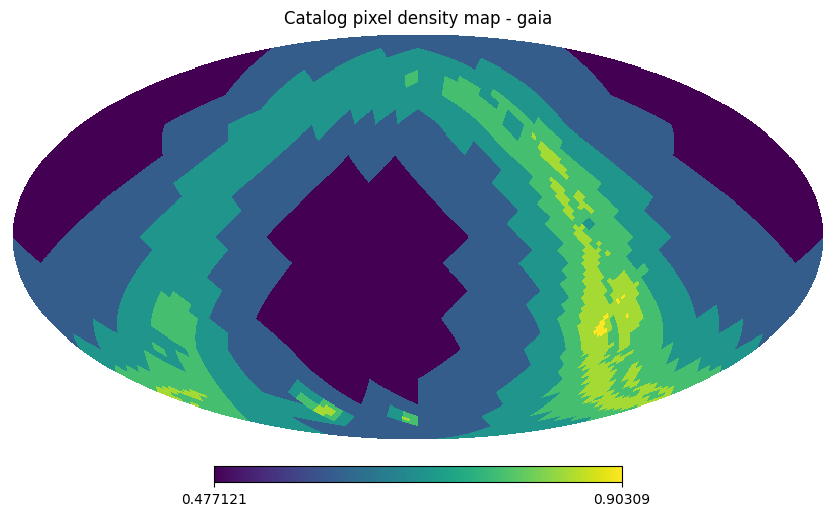

In [19]:

from hipscat.inspection import plot_pixels, plot_points
plot_pixels(cloud_gaia)

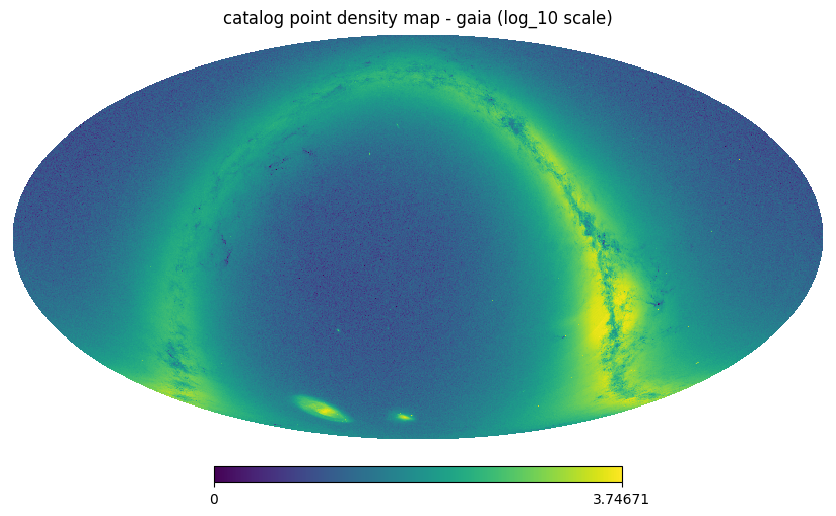

In [20]:
plot_points(cloud_gaia)